<a href="https://colab.research.google.com/github/Gujeah/Heart-Disease/blob/main/Mid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary labralies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
!pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
def wrangle(filepath):
  df=pd.read_csv(filepath)
  df.drop_duplicates(inplace=True)
  return df

In [ ]:
url="https://raw.githubusercontent.com/Gujeah/Machine-learning-zoomcamp/refs/heads/main/classification%20module/heart_disease_uci.csv"

In [ ]:
df=wrangle(url)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


We need to understand our datta better

In [ ]:
df.shape

(920, 16)

In [ ]:
df.set_index('id', inplace=True)


In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.iloc[0:1]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0


In [ ]:
df.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

##The column names in full names
age: Age of the patient (in years)<br>
sex: Gender of the patient (e.g., 1 = Male, 0 = Female).<br>
dataset: Source of the data<br>
cp: Chest pain type:<br>
0 = Typical Angina (chest pain related to decreased blood supply to the heart)<br>
1 = Atypical Angina (chest pain not related to heart)<br>
2 = Non-Anginal Pain (not related to the heart).<br>
3 = Asymptomatic (no chest pain)<br>
trestbps: Resting blood pressure (in mm Hg on admission to the hospital).<br>
chol: Serum cholesterol level (in mg/dL).<br>
fbs: Fasting blood sugar > 120 mg/dL (boolean):<br>
1 = True.<br>
0 = False.<br>
restecg: Resting electrocardiographic results:<br>
0 = Normal.<br>
1 = Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV).<br>
2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria.<br>
thalch: Maximum heart rate achieved.<br>
exang: Exercise-induced angina (boolean):<br>
1 = Yes.<br>
0 = No.<br>
oldpeak: ST depression induced by exercise relative to rest (measured in mm).<br>
slope: The slope of the peak exercise ST segment:<br>
0 = Upsloping.<br>
1 = Flat.<br>
2 = Downsloping.<br>
ca: Number of major vessels (0–3) colored by fluoroscopy.<br>
thal: Thalassemia (blood disorder affecting hemoglobin levels):<br>
1 = Normal.<br>
2 = Fixed defect (no blood flow in some part of the heart).<br>
3 = Reversible defect (a defect in blood flow is observed, but it can be reversed).<br>
num: The target variable representing the presence of heart disease:<br>
0 = No heart disease.<br>
1–4 = Different levels of heart disease severity.<br>


As we have seen some column contents doesnt have good formating we need to change those to god format

In [ ]:
df.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [ ]:
categorycol= df.select_dtypes(include=["object"]).columns
for c in categorycol:
  print (df[c].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
fbs
False    692
True     138
Name: count, dtype: int64
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang
False    528
True     337
Name: count, dtype: int64
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


As we have seen, our contents are not uniform we need to make them small letters and also remove some space

In [ ]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)
for c in categorical_columns:

    if pd.api.types.is_string_dtype(df[c]):
        df[c] = df[c].str.lower().str.replace(" ", "_").str.replace("-", "_")
    else:

        df[c] = df[c].astype(str).str.lower().str.replace(" ", "_").str.replace("-", "_")

Lets try again to check the way it is looking now

In [ ]:
categorycol= df.select_dtypes(include=["object"]).columns
for c in categorycol:
  print (df[c].value_counts())

sex
male      726
female    194
Name: count, dtype: int64
dataset
cleveland        304
hungary          293
va_long_beach    200
switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non_anginal        204
atypical_angina    174
typical_angina      46
Name: count, dtype: int64
fbs
false    692
true     138
nan       90
Name: count, dtype: int64
restecg
normal              551
lv_hypertrophy      188
st_t_abnormality    179
nan                   2
Name: count, dtype: int64
exang
false    528
true     337
nan       55
Name: count, dtype: int64
slope
flat           345
nan            309
upsloping      203
downsloping     63
Name: count, dtype: int64
thal
nan                  486
normal               196
reversable_defect    192
fixed_defect          46
Name: count, dtype: int64


Lets now change the columns that have a true or false to 1 and 0

In [ ]:
df.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,true,lv_hypertrophy,150.0,false,2.3,downsloping,0.0,fixed_defect,0
2,67,male,cleveland,asymptomatic,160.0,286.0,false,lv_hypertrophy,108.0,true,1.5,flat,3.0,normal,2
3,67,male,cleveland,asymptomatic,120.0,229.0,false,lv_hypertrophy,129.0,true,2.6,flat,2.0,reversable_defect,1


In [ ]:
df.fbs=(df.fbs=="true").astype(int)
df.fbs.head()

,fbs
id,
1,1
2,0
3,0
4,0
5,0


In [ ]:
df.fbs.value_counts(normalize=True)

,proportion
fbs,
0,0.85
1,0.15


In [ ]:
df.exang=(df.exang=="true").astype(int)
df.exang.head()

,exang
id,
1,0
2,1
3,1
4,0
5,0


In [ ]:
df.exang.value_counts(normalize=True)

,proportion
exang,
0,0.633696
1,0.366304


In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,flat,3.0,normal,2
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
4,37,male,cleveland,non_anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
5,41,female,cleveland,atypical_angina,130.0,204.0,0,lv_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [ ]:
#lets check for the information of this data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       920 non-null    int64  
 7   restecg   920 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     920 non-null    int64  
 10  oldpeak   858 non-null    float64
 11  slope     920 non-null    object 
 12  ca        309 non-null    float64
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 115.0+ KB


As we can see our data has some missing values so lets assess thoseone the percentages

In [ ]:
df.isnull().sum()/len(df)*100

,0
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,0.000000
restecg,0.000000
thalch,5.978261
exang,0.000000


In [ ]:
df.describe()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
count,920.000000,861.000000,890.000000,920.000000,865.000000,920.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,0.150000,137.545665,0.366304,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,0.357266,25.926276,0.482056,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,157.000000,1.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000


As we can see we have some missing number<br>
restbps, chol, thalch, exang, oldpeak has less than 10% missing numbers<br>
fbs and restecg have in between (10%-30%) missing numbers <br>
slope, ca, and thal has morethan 30% missing number

lets analyze the column with less than 10% missing values about their distribution

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,flat,3.0,normal,2
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
4,37,male,cleveland,non_anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
5,41,female,cleveland,atypical_angina,130.0,204.0,0,lv_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [ ]:
n1_variables=["chol", "thalch", "trestbps", "oldpeak"]

<ipython-input-133-58ac1e1c2132>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='g')


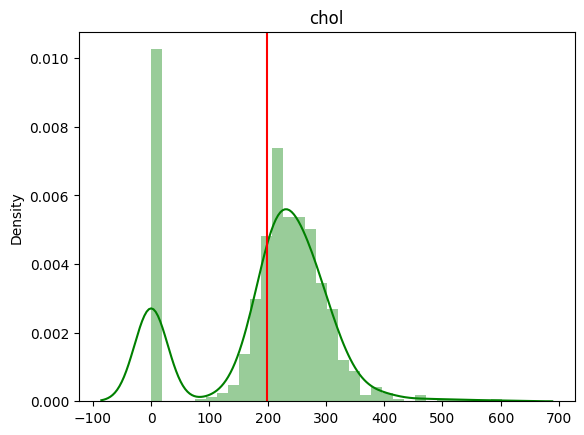

<ipython-input-133-58ac1e1c2132>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='g')


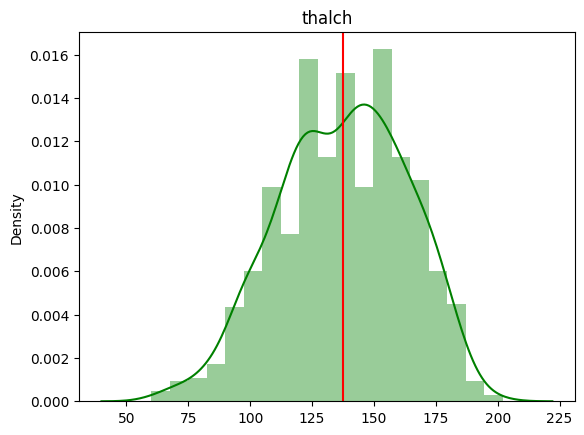

<ipython-input-133-58ac1e1c2132>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='g')


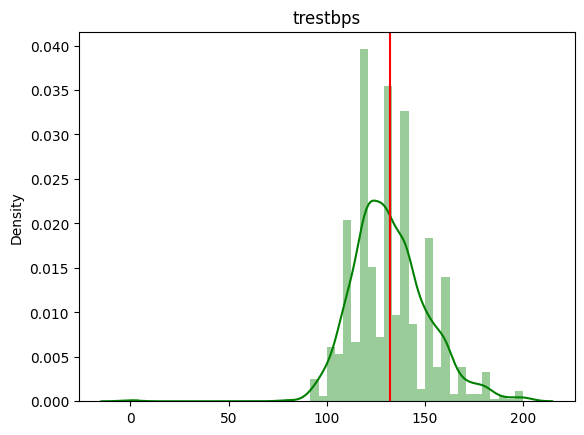

<ipython-input-133-58ac1e1c2132>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='g')


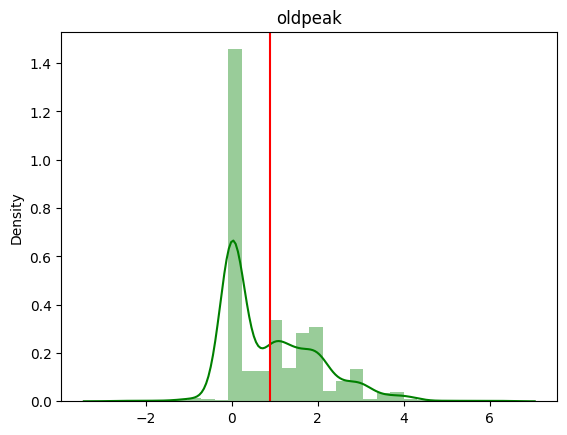

In [ ]:
for n in n1_variables:
  x=df[n].values
  sns.distplot(x, color='g')
  mean=df[n].mean()
  mode=df[n].mode()
  median=df[n].median()
  plt.axvline(mean,  0, 1, color='r')
  plt.title(n)
  plt.show()



In [ ]:
df[n1_variables].nunique()

,0
chol,217
thalch,119
trestbps,61
oldpeak,53


Lets remove those columns with high missing values as they wont add much value<br>
Slope has 33% missing values<br>
Thai has 52.8% missing values <br>
Ca has 66.4% missing values

In [ ]:
high_missing_values= ["slope", "ca", "thal"]

In [ ]:
df1.drop(columns=high_missing_values, inplace=True)

In [ ]:
df1.head(4)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
id,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,2
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,1
4,37,male,cleveland,non_anginal,130.0,250.0,0,normal,187.0,0,3.5,0


For a normal distribution lets use mean to impute missing values. for skewed lets use a median. For categorical lets try a mode. These is from those below 10%
restbps, chol, thalch, exang, oldpeak has less than 10% missing numbers

In [ ]:
n1_variables=["chol", "thalch", "trestbps", "oldpeak"]

In [ ]:
df1['chol'].fillna(df1['chol'].median(), inplace=True)
df1['thalch'].fillna(df1['thalch'].mean(), inplace=True)
df1["trestbps"].fillna(df1["trestbps"]. median(), inplace=True)
df1['oldpeak'].fillna(df1['oldpeak'].median(), inplace=True)
df1['exang'].fillna(df1['exang'].mode()[0], inplace=True)
df1['restecg'].fillna(df1['restecg'].mode()[0], inplace=True)
df1['fbs'].fillna(df1['fbs'].mode()[0], inplace=True)

In [ ]:
df1.isnull().sum()/len(df1)*100

,0
age,0.0
sex,0.0
dataset,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalch,0.0
exang,0.0


In [ ]:
df1.dtypes

,0
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,int64
restecg,object
thalch,float64
exang,int64


In [ ]:
df1.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'num'],
      dtype='object')

Lets investigate the categorical data on how it is giving

In [ ]:
categorical=[ 'sex', 'dataset', 'cp', 'fbs','restecg', 'exang']

In [ ]:
df1[categorical].nunique()

,0
sex,2
dataset,4
cp,4
fbs,2
restecg,4
exang,2


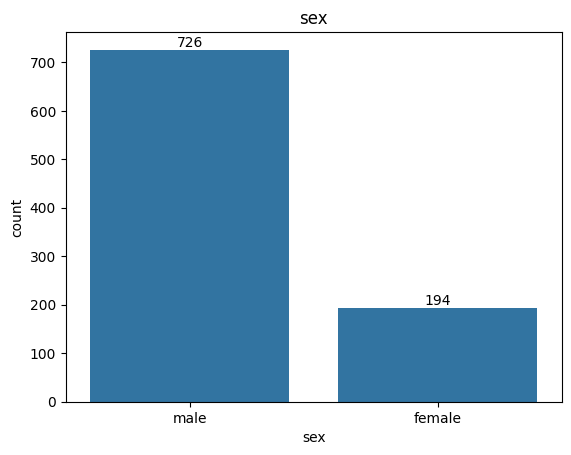

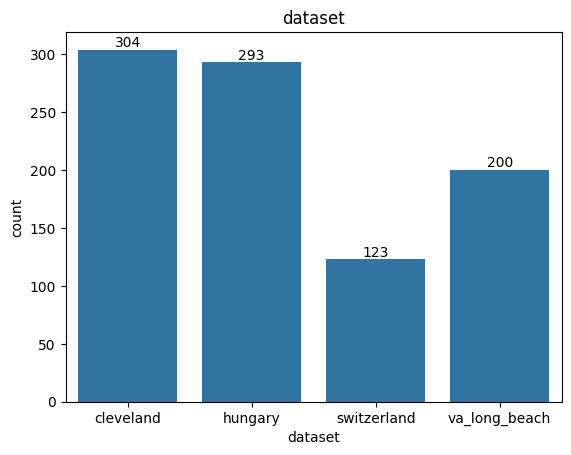

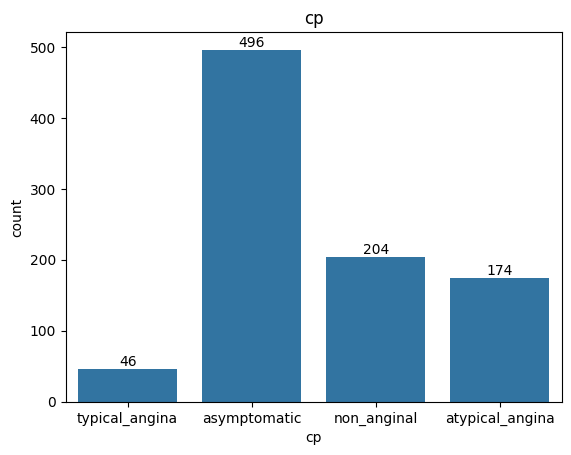

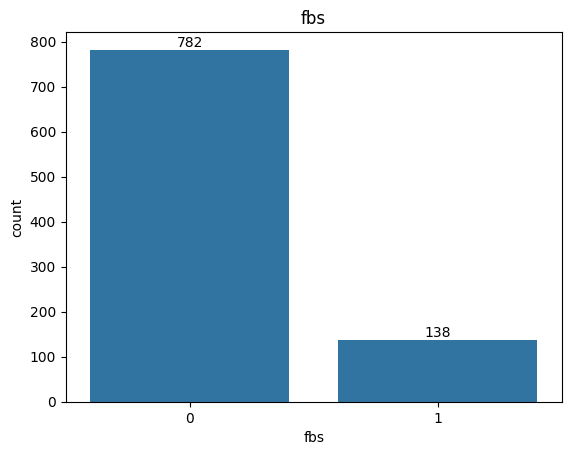

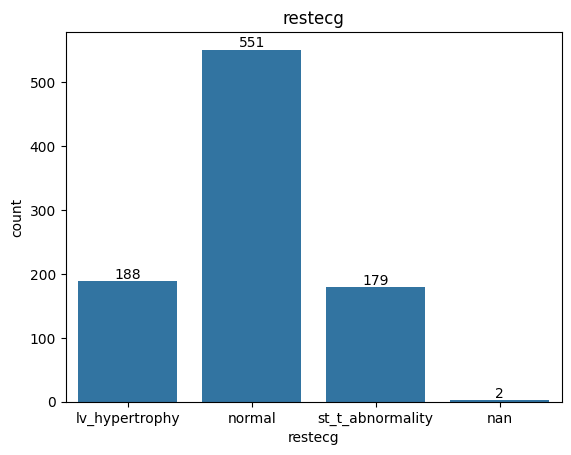

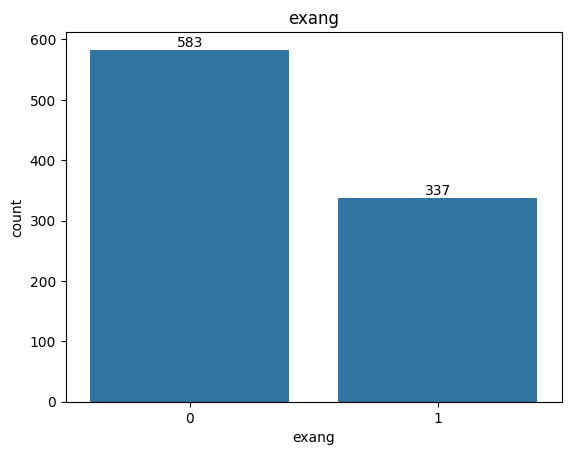

In [ ]:
for n in categorical:
  ax = sns.countplot(x=n, data=df1)
  for container in ax.containers:
    ax.bar_label(container)
  plt.title(n)
  plt.show()



In [ ]:
df1.num.value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


Converting categorical to numerical

In [ ]:
df1.num.unique()

array([0, 2, 1, 3, 4])

In [ ]:
df2=df1.copy()

My goal is to determine about whether the person has the presence of heart disease or not , not specifically telling the person the type of that heart disease. Next colab, I will go in details on the specificity but for the sake of this colab we will do binary classification

In [ ]:
df2['target_variable'] = (df2['num'] > 0).astype(int)


In [ ]:
df2.target_variable.unique()

array([0, 1])

In [ ]:
df2.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,target_variable
id,,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,0,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,2,1
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,1,1
4,37,male,cleveland,non_anginal,130.0,250.0,0,normal,187.0,0,3.5,0,0
5,41,female,cleveland,atypical_angina,130.0,204.0,0,lv_hypertrophy,172.0,0,1.4,0,0


In [ ]:
df2.drop(columns='num', inplace=True)

In [ ]:
df2.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target_variable
id,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,1
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,1
4,37,male,cleveland,non_anginal,130.0,250.0,0,normal,187.0,0,3.5,0
5,41,female,cleveland,atypical_angina,130.0,204.0,0,lv_hypertrophy,172.0,0,1.4,0


In [ ]:
df2.restecg.value_counts()

,count
restecg,
normal,551
lv_hypertrophy,188
st_t_abnormality,179
nan,2


In [ ]:
df2.dtypes

,0
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,int64
restecg,object
thalch,float64
exang,int64


In [ ]:
#checking if our target variable has inbalance class
imbalance=df2['target_variable'].value_counts(normalize=True)
imbalance

,proportion
target_variable,
1,0.553261
0,0.446739


Checking for Correlation

Lets check for the correlation of our numerical data. <br>
If we have two variables which are more correlted, we drop the one with the least predictive power




In [ ]:
df2.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'target_variable'],
      dtype='object')

In [ ]:
num_variables=["age","trestbps","chol", "thalch","oldpeak"]

<Axes: >

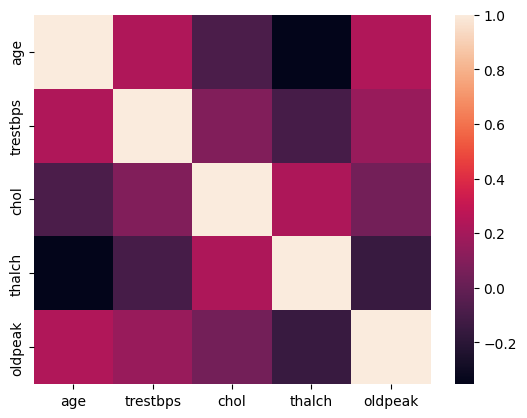

In [ ]:
correlation=df2[num_variables].corr()
sns.heatmap(correlation)

As we can see from the heatmap above, there are no multicorrelanity so we are safe. We checked for multicorrelinearity because even for logistic regression there are also linear models

Lets not check our target variable

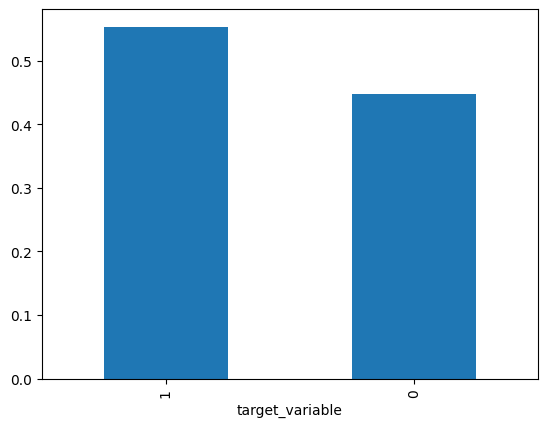

In [ ]:
df2["target_variable"].value_counts(normalize=True).plot(kind="bar");

In [ ]:
df2.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target_variable
id,,,,,,,,,,,,
1,63,male,cleveland,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,0
2,67,male,cleveland,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,1
3,67,male,cleveland,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,1


In [ ]:
df2["restecg"].value_counts(normalize=True)

,proportion
restecg,
normal,0.598913
lv_hypertrophy,0.204348
st_t_abnormality,0.194565
nan,0.002174


In [ ]:
dataset_pivot=pd.pivot_table(

    df2, index="dataset", values="target_variable", aggfunc=np.mean
).sort_values(by="target_variable")
dataset_pivot

,target_variable
dataset,
hungary,0.361775
cleveland,0.457237
va_long_beach,0.745000
switzerland,0.934959


In [ ]:
majority_class_prop, minority_class_prop =df2["target_variable"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.5532608695652174 0.4467391304347826


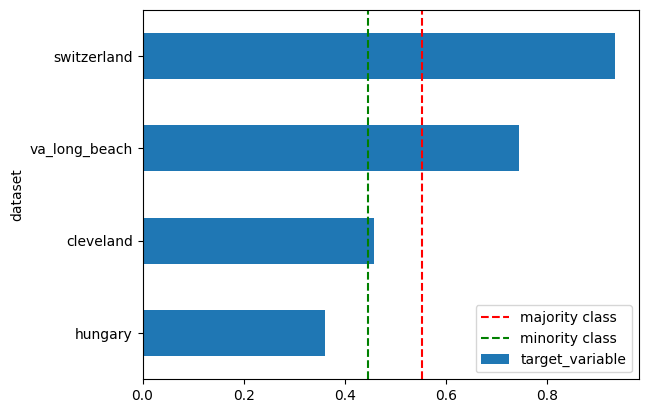

In [ ]:
dataset_pivot.plot(kind="barh", legend=None)
plt.axvline(majority_class_prop, linestyle="--", c="r", label="majority class")
plt.axvline(minority_class_prop, linestyle="--", c="g", label="minority class")
plt.legend(loc="lower right");

From the graph above we can literally see Switzerland and VA are way beyond the majority class unlike Hungary

In [ ]:
cp_pivot=pd.pivot_table(

    df2, index="cp", values="target_variable", aggfunc=np.mean
).sort_values(by="target_variable")
cp_pivot

,target_variable
cp,
atypical_angina,0.137931
non_anginal,0.357843
typical_angina,0.434783
asymptomatic,0.790323


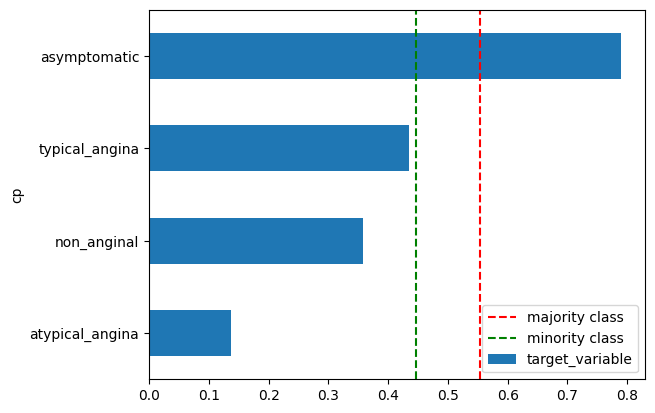

In [ ]:
cp_pivot.plot(kind="barh", legend=None)
plt.axvline(majority_class_prop, linestyle="--", c="r", label="majority class")
plt.axvline(minority_class_prop, linestyle="--", c="g", label="minority class")
plt.legend(loc="lower right");

In [ ]:
restecg_pivot=pd.pivot_table(

    df2, index="restecg", values="target_variable", aggfunc=np.mean
).sort_values(by="target_variable")
restecg_pivot

,target_variable
restecg,
normal,0.513612
lv_hypertrophy,0.563830
st_t_abnormality,0.659218
nan,1.000000


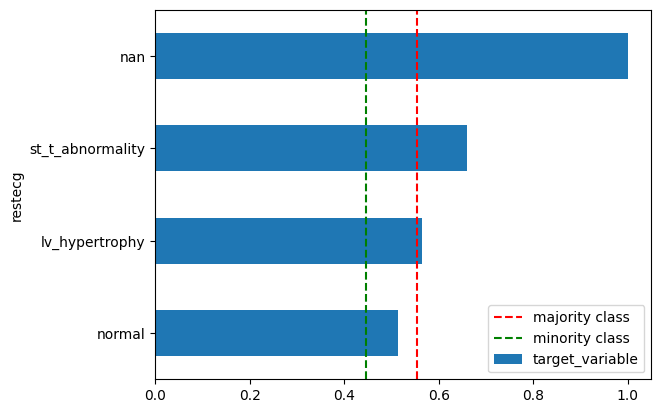

In [ ]:
restecg_pivot.plot(kind="barh", legend=None)
plt.axvline(majority_class_prop, linestyle="--", c="r", label="majority class")
plt.axvline(minority_class_prop, linestyle="--", c="g", label="minority class")
plt.legend(loc="lower right");

Lets check if our data has high cardinality or not

In [ ]:
df2.select_dtypes("object").nunique()

,0
sex,2
dataset,4
cp,4
restecg,4


Conclusion: our data doesnt have a high cardinality

In [ ]:
df2.dtypes

,0
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,int64
restecg,object
thalch,float64
exang,int64


We should split our data to X and y for model training

In [ ]:
target="target_variable"
X=df2.drop(columns=[target])
y=df2[target]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (736, 11)
y_train shape: (736,)
X_test shape: (184, 11)
y_test shape: (184,)


In [ ]:
X_train.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak'],
      dtype='object')

In [ ]:
X_train.dtypes

,0
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,int64
restecg,object
thalch,float64
exang,int64


Logistic Regression<br>
The sigmoid function is defined as:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Building a Baseline model

In [ ]:
baseline=y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline, 2))

Baseline Accuracy: 0.54


Conclusion: Whateve the case, our model results should not be below 54%

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Lets now build our Model

In [ ]:
model=make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'dataset', 'cp', 'restecg'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
model.predict(X_train[:8])

array([1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_pred_proba=model.predict_proba(X_train[:8])
y_pred_proba

array([[0.02463276, 0.97536724],
       [0.76634909, 0.23365091],
       [0.63506756, 0.36493244],
       [0.88625481, 0.11374519],
       [0.88506946, 0.11493054],
       [0.45865964, 0.54134036],
       [0.86958136, 0.13041864],
       [0.1024886 , 0.8975114 ]])

In [ ]:
train_accuracy =accuracy_score(y_train, model.predict(X_train))
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", round(train_accuracy, 2))
print("Test Accuracy:", round(test_accuracy, 2))

Training Accuracy: 0.82
Test Accuracy: 0.8


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        75
           1       0.85      0.81      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



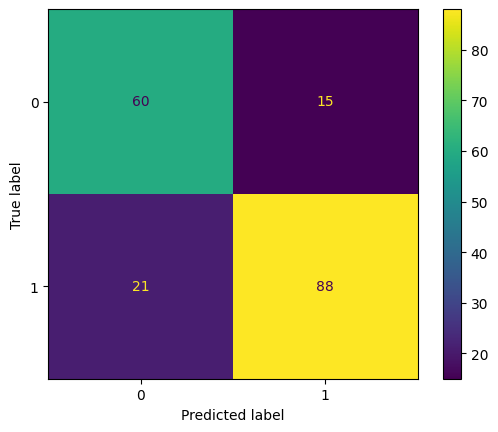

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

The left side is negative class while the right side is positive side

Lets now explore the Odd Ratio: Features that will be associated with the risk of heart attack

In [ ]:
features=model.named_steps["onehotencoder"].get_feature_names()
importances=model.named_steps["logisticregression"].coef_[0]

In [ ]:
feature_importance=pd.Series(np.exp(importances), index=features).sort_values()
feature_importance.head()

,0
dataset_hungary,0.441241
sex_female,0.448157
dataset_cleveland,0.485329
cp_atypical_angina,0.488770
dataset_va_long_beach,0.666333


In [ ]:
odds_ratios =pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

,0
dataset_hungary,0.441241
sex_female,0.448157
dataset_cleveland,0.485329
cp_atypical_angina,0.488770
dataset_va_long_beach,0.666333


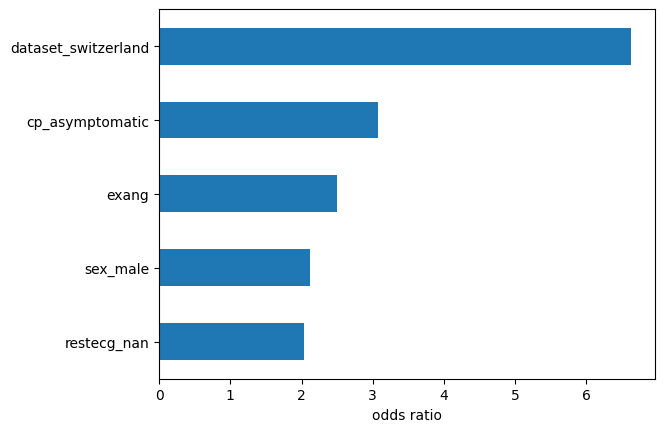

In [ ]:
odds_ratios.tail().plot(kind="barh")
plt.xlabel("odds ratio");

Lets look at the least contributors

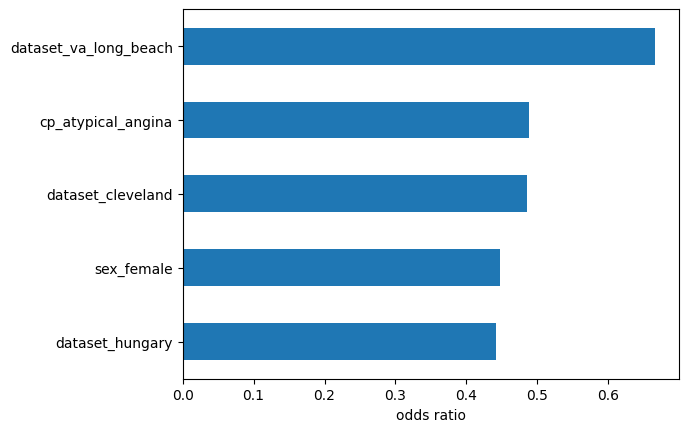

In [ ]:
odds_ratios.head().plot(kind="barh")
plt.xlabel("odds ratio");

Using a Decision Tree Classfier

Perfoming train test split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Perfoming a randomized test split

In [ ]:
X_train, X_val, y_train,y_val=train_test_split(X_train,y_train, test_size=0.2, random_state=42)

Baseline model

In [ ]:
base=y_train.value_counts(normalize=True).max()
base

0.54421768707483

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model1=make_pipeline(
    # OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
     OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=42)
)
model1.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'dataset', 'cp', 'restecg'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Finding the accuracy fro the training and validation data

In [ ]:
training_accuracy=accuracy_score(y_train, model1.predict(X_train))
validation_accuracy=model1.score(X_val, y_val)
print(f"the accuracy of training data is {training_accuracy}")
print(f"the accuracy of validation data is {validation_accuracy}")

the accuracy of training data is 1.0
the accuracy of validation data is 0.6418918918918919


Conclusion: This model is overfitting meaning it is not generalizing well. This could be that it has taken more depth which increased the chances of overfitting. So lets explore the number of depth this model has on this data


In [ ]:
depth=model1.named_steps["decisiontreeclassifier"].get_depth()
print(f"it has a tree depth of : {depth}")

it has a tree depth of : 17


Lets explore hyperparameter tuning

In [ ]:
depth_params=range(1,18,1)

In [ ]:
training_acc=[]
validation_acc=[]
for d in depth_params:
  hyper_model=make_pipeline(
    # OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
     OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=d, random_state=42)
)
  hyper_model.fit(X_train, y_train)
  training_acc.append(hyper_model.score(X_train, y_train))
  validation_acc.append(hyper_model.score(X_val, y_val))
print(f"training accuracy score: {training_acc[:4]}")
print(f"validation accuracy score: {validation_acc[:4]}")


training accuracy score: [0.75, 0.7738095238095238, 0.7891156462585034, 0.8180272108843537]
validation accuracy score: [0.7702702702702703, 0.7905405405405406, 0.7635135135135135, 0.7702702702702703]


Lets plot to see where exactly to consider getting our depth

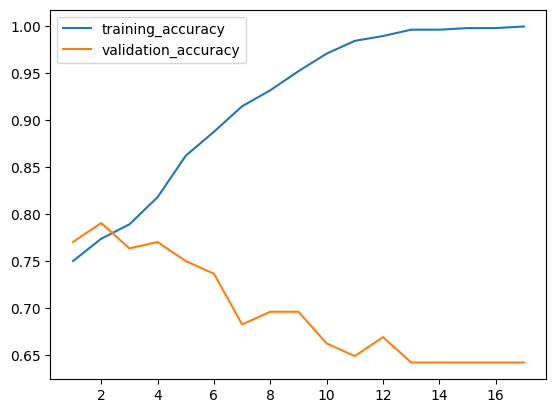

In [ ]:
plt.plot(depth_params, training_acc, label="training_accuracy")
plt.plot(depth_params, validation_acc, label="validation_accuracy")
plt.legend();

So redoing our first model again using a max_depth of 2, retraining our model

In [ ]:
model1=make_pipeline(
    # OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
     OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=2,random_state=42)
)
model1.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'dataset', 'cp', 'restecg'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [ ]:
training_accuracy=accuracy_score(y_train, model1.predict(X_train))
validation_accuracy=model1.score(X_val, y_val)
print(f"the accuracy of training data is {training_accuracy}")
print(f"the accuracy of validation data is {validation_accuracy}")

the accuracy of training data is 0.7738095238095238
the accuracy of validation data is 0.7905405405405406


Conclusion: Now it is atleast making sense. It shows that our mdel is generalizing properly

Now lets try our testing data

In [ ]:
test_acc=model1.score(X_test, y_test)
print(f"the accuracy of testing data is : {test_acc}")

the accuracy of testing data is : 0.8097826086956522


Plotting the tree

In [ ]:
from sklearn.tree import plot_tree

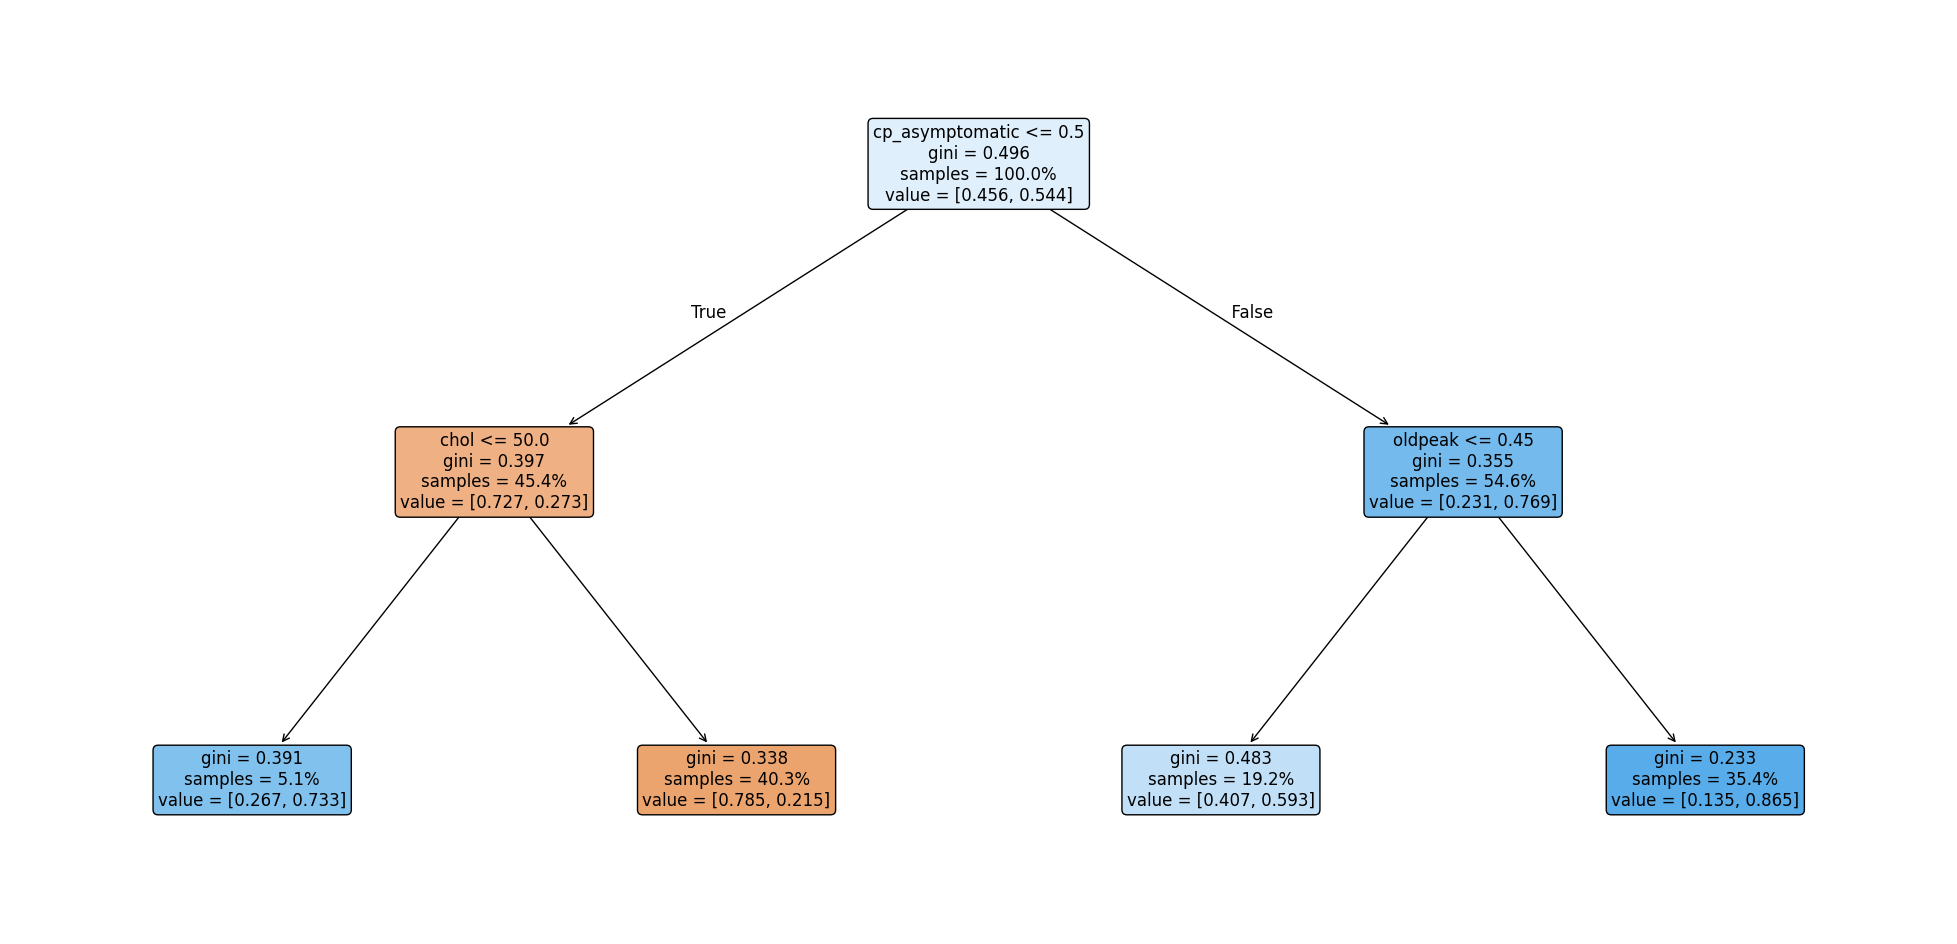

In [ ]:
fig, ax = plt.subplots(figsize=(25, 12))
feature_names = model1.named_steps["decisiontreeclassifier"].feature_names_in_

plot_tree(
    decision_tree=model1.named_steps["decisiontreeclassifier"],
    feature_names=feature_names,
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=2,
    fontsize=12,
    ax=ax,
);

In [ ]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        75
           1       0.85      0.83      0.84       109

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.81      0.81       184



[tn, fp],<br>
 [fn, tp]

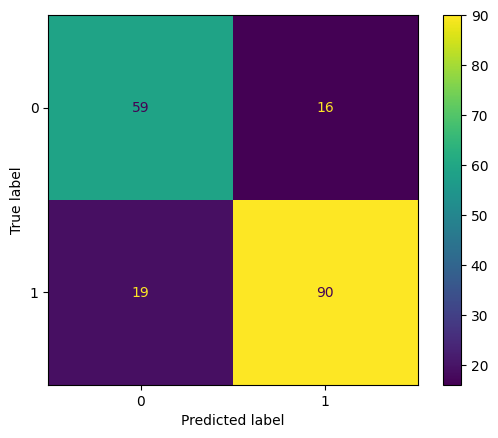

In [ ]:
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test);

In [ ]:
import sklearn
print('Area Under ROC-Curve: ', sklearn.metrics.roc_auc_score(y_test, model1.predict(X_test)))

Area Under ROC-Curve:  0.806177370030581


In [ ]:
print('Area Under ROC-Curve: ', sklearn.metrics.roc_auc_score(y_val, model1.predict(X_val)))

Area Under ROC-Curve:  0.7863970588235294


Saving the Model

In [ ]:
import pickle

In [ ]:
output_file="model.pkl"
output_file

'model.pkl'

In [ ]:
pickle.dump(model1, open(output_file, "wb"))

In [ ]:
load_model=pickle.load(open(output_file,"rb"))

In [ ]:
test_row = X_test.iloc[0]
test_row.to_dict()


{'age': 36,
 'sex': 'male',
 'dataset': 'hungary',
 'cp': 'atypical_angina',
 'trestbps': 120.0,
 'chol': 166.0,
 'fbs': 0,
 'restecg': 'normal',
 'thalch': 180.0,
 'exang': 0,
 'oldpeak': 0.0}

In [ ]:
test_row = X_test.iloc[0:1]

In [ ]:
print(load_model.predict_proba(test_row))

[[0.78481013 0.21518987]]


In [ ]:
print("Model feature names:", load_model.named_steps['onehotencoder'].get_feature_names_out())
print("Input DataFrame columns:", user_dataframe.columns)


Model feature names: ['age' 'sex_female' 'sex_male' 'dataset_cleveland' 'dataset_va_long_beach'
 'dataset_switzerland' 'dataset_hungary' 'cp_non_anginal'
 'cp_asymptomatic' 'cp_atypical_angina' 'cp_typical_angina' 'trestbps'
 'chol' 'fbs' 'restecg_lv_hypertrophy' 'restecg_st_t_abnormality'
 'restecg_normal' 'restecg_nan' 'thalch' 'exang' 'oldpeak']


NameError: name 'user_dataframe' is not defined